In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install openpyxl
train_df = pd.read_excel(r"C:\Users\udaya\OneDrive\Desktop\Excel_Tables\Data_Train.xlsx")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
test_df = pd.read_excel(r"C:\Users\udaya\OneDrive\Desktop\Excel_Tables\Test_set.xlsx")

In [6]:
final_df =pd.concat([train_df,test_df],ignore_index=True)

In [7]:
final_df['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
13349     [6, 06, 2019]
13350    [27, 03, 2019]
13351     [6, 03, 2019]
13352     [6, 03, 2019]
13353    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [8]:
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [9]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [10]:
final_df = final_df.drop('Date_of_Journey',axis=1)

In [11]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(" ").str[0]

In [12]:
final_df['Arrival_Hour'] = final_df['Arrival_Time'].str.split(":").str[0]
final_df['Arrival_Minute'] = final_df['Arrival_Time'].str.split(":").str[1]

In [13]:
final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype(int)
final_df['Arrival_Minute'] = final_df['Arrival_Minute'].astype(int)

In [14]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_Hour     13354 non-null  int32  
 13  Arrival_Minute   13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.2+ MB


In [16]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [17]:
final_df['Dep_Hour'] = final_df['Dep_Time'].str.split(":").str[0]
final_df['Dep_Minute'] = final_df['Dep_Time'].str.split(":").str[1]

In [18]:
final_df['Dep_Hour'] = final_df['Dep_Hour'].astype(int)
final_df['Dep_Minute'] = final_df['Dep_Minute'].astype(int)

In [19]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [20]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Minute   13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_Minute       13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [22]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [24]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'np.nan' : 1})

In [25]:
final_df.drop('Route',axis=1,inplace=True)

In [26]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [27]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_Minute   13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_Minute       13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.1+ MB


In [29]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [30]:
final_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [31]:
final_df['Hour_Time']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [32]:
final_df[final_df['Duration'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Hour_Time
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [33]:
final_df.drop([6474,13343,9039] , axis = 0,inplace=True)

In [34]:
final_df['Hour_Time'] = final_df['Hour_Time'].astype(int)

In [35]:
final_df['Hour_Time'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39, 41, 40])

In [36]:
final_df['Minute_Time']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [37]:
type(final_df['Minute_Time'])

pandas.core.series.Series

In [38]:
final_df['Minute_Time'].replace(to_replace = np.nan ,value=0, inplace=True)

C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\1544742375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Minute_Time'].replace(to_replace = np.nan ,value=0, inplace=True)


In [39]:
final_df['Minute_Time'] = final_df['Minute_Time'].astype(int)

In [40]:
final_df['Minute_Time'].dtype

dtype('int32')

In [41]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Hour_Time,Minute_Time
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55
13350,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35
13351,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35
13352,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15


In [42]:
final_df['Duration']=final_df['Hour_Time'] * 60 + final_df['Minute_Time']

In [43]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Hour_Time,Minute_Time
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [44]:
final_df.drop(['Hour_Time','Minute_Time'],axis=1,inplace=True)

In [45]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [46]:
type(final_df['Airline'])

pandas.core.series.Series

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  int32  
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_Hour     13351 non-null  int32  
 11  Arrival_Minute   13351 non-null  int32  
 12  Dep_Hour         13351 non-null  int32  
 13  Dep_Minute       13351 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [48]:
'''from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()'''

'from sklearn.preprocessing import LabelEncoder\nl = LabelEncoder()'

In [49]:
'''final_df['Airline'] = l.fit_transform(final_df['Airline'])
final_df['Source'] = l.fit_transform(final_df['Source'])
final_df['Destination'] = l.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = l.fit_transform(final_df['Additional_Info'])'''

"final_df['Airline'] = l.fit_transform(final_df['Airline'])\nfinal_df['Source'] = l.fit_transform(final_df['Source'])\nfinal_df['Destination'] = l.fit_transform(final_df['Destination'])\nfinal_df['Additional_Info'] = l.fit_transform(final_df['Additional_Info'])"

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  int32  
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_Hour     13351 non-null  int32  
 11  Arrival_Minute   13351 non-null  int32  
 12  Dep_Hour         13351 non-null  int32  
 13  Dep_Minute       13351 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [51]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
dtype: int64

In [52]:
final_train = final_df[~final_df['Price'].isnull()]
final_test = final_df[final_df['Price'].isnull()]

In [53]:
print(final_train.shape)
print(final_test.shape)

(10681, 14)
(2670, 14)


In [54]:
x = final_train.drop('Price',axis=1)
y = final_train['Price']

In [55]:
x['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [57]:
#finding outliers
def plot(df,col):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\4153651058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\4153651058.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)


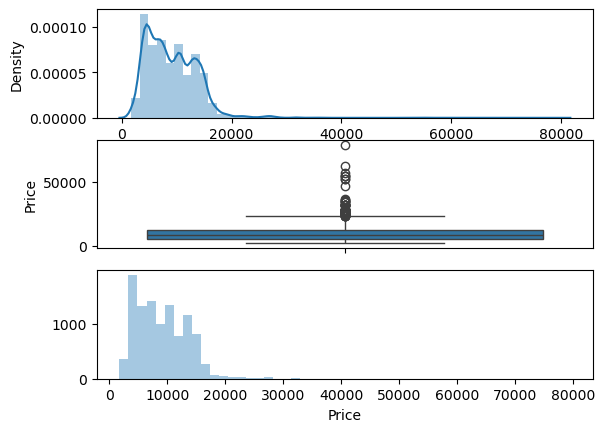

In [58]:
plot(final_df,'Price')

In [59]:
q1=final_df['Price'].quantile(0.25)
q3 = final_df['Price'].quantile(0.75)

iqr = q3-q1
maximum = q3+1.5*iqr
minimum = q1-1.5*iqr

In [60]:
maximum

23017.0

In [61]:
minimum

-5367.0

In [62]:
print(len([price for price in final_df['Price'] if price>maximum or price<minimum]))

94


In [63]:
final_df['Price'] = np.where(final_df['Price']>=25000,final_df['Price'].median(),final_df['Price'])

In [64]:
final_df['Price'].unique()

array([ 3897.,  7662., 13882., ..., 12352., 12648.,    nan])

C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\4153651058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\4153651058.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)


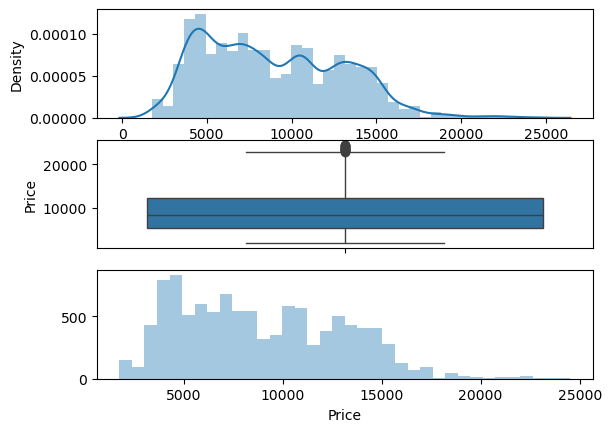

In [65]:
plot(final_df,'Price')

In [66]:
x.shape

(10681, 42)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
x_train.shape

(8544, 42)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
x_train

array([[-0.17574991, -0.43623813, -0.13637447, ...,  1.53198649,
         1.32085372, -0.23590344],
       [-0.17574991, -0.43623813,  7.33275056, ...,  0.01642567,
        -1.12209459,  0.56318167],
       [-0.17574991, -0.43623813, -0.13637447, ...,  0.01642567,
         1.66984634,  1.36226679],
       ...,
       [-0.17574991, -0.43623813, -0.13637447, ...,  0.01642567,
        -0.77310197, -1.30135026],
       [-0.17574991, -0.43623813, -0.13637447, ...,  0.01642567,
         1.66984634, -1.03498856],
       [-0.17574991, -0.43623813, -0.13637447, ...,  0.62265   ,
         1.32085372,  0.03045826]])

In [71]:
#import tensorflow as tf
#ann = tf.keras.models.Sequential()

In [72]:
#ann.add(tf.keras.layers.Dense(units = 20,activation = "relu"))

In [73]:
#ann.add(tf.keras.layers.Dense(units = 20,activation = "relu"))

In [74]:
'''param_grid = { 
    'n_estimators': [25, 50, 100, 150,200,250,300],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} '''

"param_grid = { \n    'n_estimators': [25, 50, 100, 150,200,250,300],\n    'max_features': ['sqrt', 'log2', None], \n    'max_depth': [3, 6, 9], \n    'max_leaf_nodes': [3, 6, 9], \n} "

In [75]:
#ann.add(tf.keras.layers.Dense(units = 1,activation = "linear"))

In [76]:
#ann.compile(optimizer = "Adam",loss = "mse",metrics=['accuracy'])

In [77]:
#ann.fit(x_train,y_train,batch_size = 32,epochs = 100)

In [78]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
y_train = y_train.to_numpy().ravel()
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)'''


'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV,RandomizedSearchCV \ngrid_search = GridSearchCV(RandomForestRegressor(), \n                           param_grid=param_grid) \ny_train = y_train.to_numpy().ravel()\ngrid_search.fit(x_train, y_train)\nprint(grid_search.best_estimator_)'

In [79]:
'''from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor()

# RandomizedSearchCV with 100 iterations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all cores for parallel processing
)

# Fit the model
random_search.fit(x_train, y_train)'''


"from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nimport numpy as np\n\n# Define the parameter grid\nparam_dist = {\n    'n_estimators': np.arange(100, 1000, 100),\n    'max_depth': np.arange(10, 50, 10),\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\n# Initialize the model\nrf = RandomForestRegressor()\n\n# RandomizedSearchCV with 100 iterations\nrandom_search = RandomizedSearchCV(\n    estimator=rf,\n    param_distributions=param_dist,\n    n_iter=100,  # Number of random combinations to try\n    cv=3,  # 3-fold cross-validation\n    verbose=2,\n    random_state=42,\n    n_jobs=-1  # Use all cores for parallel processing\n)\n\n# Fit the model\nrandom_search.fit(x_train, y_train)"

In [80]:
from sklearn.ensemble import RandomForestRegressor
linear = RandomForestRegressor()
linear.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
'''from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)'''

'from sklearn.linear_model import LinearRegression\nlinear = LinearRegression()\nlinear.fit(x_train,y_train)'

In [82]:
y_pred=linear.predict(x_test)

In [83]:
#y_pred = linear.predict(x_test)

C:\Users\udaya\AppData\Local\Temp\ipykernel_12688\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Price', ylabel='Density'>

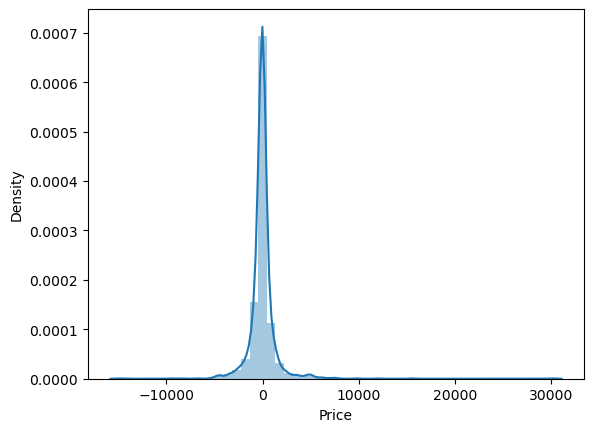

In [179]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

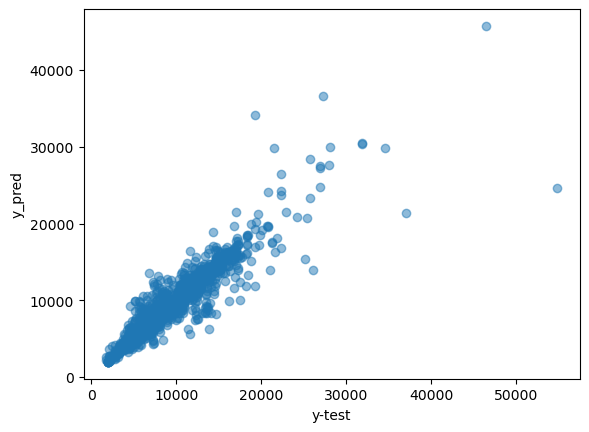

In [194]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y-test")
plt.ylabel("y_pred")

In [195]:
y_pred1 = linear.predict(x_train)

In [183]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred1)

0.98185826879844

In [185]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,y_pred)
acc

0.8986615557221276

In [187]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

670.8144563993434

In [189]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

2186582.0922073186